#### Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# load the dataset
df = pd.read_csv('nova_pay_transcations.csv')
df.head()

,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,US,USD,CAD,ATM,278.19,278.19,4.25,...,0.123,standard,263,0.522,0,0.223,0,0,0.0,0
1,bfdb9fc1-27fe-4a85-b043-4d813d679259,67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad,2022-10-03 20:39:38.468549+00:00,CA,CAD,MXN,web,208.51,154.29,4.24,...,0.569,standard,947,0.475,0,0.268,0,1,0.0,0
2,fc855034-3ea5-4993-9afa-b511d93fe5e8,6d0d9b27-fa26-45f8-93b1-2df29d182d9c,2022-10-03 23:02:43.468549+00:00,US,USD,CNY,mobile,160.33,160.33,2.70,...,0.437,enhanced,367,0.939,0,0.176,0,0,0.0,0
3,2cf8c08e-42ec-444d-a755-34b9a2a0a4ca,7bd5200c-5d19-44f0-9afe-8b339a05366b,2022-10-04 01:08:53.468549+00:00,US,USD,EUR,mobile,59.41,59.41,2.22,...,0.594,standard,147,0.551,0,0.391,0,0,0.0,0
4,d907a74d-b426-438d-97eb-dbe911aca91c,70a93d26-8e3a-4179-900c-a4a7a74d08e5,2022-10-04 09:35:03.468549+00:00,US,USD,INR,mobile,200.96,200.96,3.61,...,0.121,enhanced,257,0.894,0,0.257,0,0,0.0,0


In [6]:
# Get the shape of the DataFrame
rows, columns = df.shape
print(f'rows: {rows}, columns: {columns}')

rows: 10200, columns: 26


In [7]:
df.columns

Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'amount_src',
       'amount_usd', 'fee', 'exchange_rate_src_to_dest', 'device_id',
       'new_device', 'ip_address', 'ip_country', 'location_mismatch',
       'ip_risk_score', 'kyc_tier', 'account_age_days', 'device_trust_score',
       'chargeback_history_count', 'risk_score_internal', 'txn_velocity_1h',
       'txn_velocity_24h', 'corridor_risk', 'is_fraud'],
      dtype='object')

In [9]:
# Get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             10200 non-null  object 
 1   customer_id                10200 non-null  object 
 2   timestamp                  10171 non-null  object 
 3   home_country               10200 non-null  object 
 4   source_currency            10200 non-null  object 
 5   dest_currency              10200 non-null  object 
 6   channel                    10200 non-null  object 
 7   amount_src                 10200 non-null  object 
 8   amount_usd                 9895 non-null   float64
 9   fee                        9905 non-null   float64
 10  exchange_rate_src_to_dest  10200 non-null  float64
 11  device_id                  10200 non-null  object 
 12  new_device                 10200 non-null  bool   
 13  ip_address                 9895 non-null   obj

The info method returns the general information of the dataset. Here we have that some columns contains null values and we will proceed to use the isnull().sum() method to show the exact number of data points that are missing in this dataset. Also we will explore further to know if the data types used in the columns are the right data types for analysis and machine learning.

In [10]:
# Check for missing values
df.isnull().sum()

transaction_id                 0
customer_id                    0
timestamp                     29
home_country                   0
source_currency                0
dest_currency                  0
channel                        0
amount_src                     0
amount_usd                   305
fee                          295
exchange_rate_src_to_dest      0
device_id                      0
new_device                     0
ip_address                   305
ip_country                   301
location_mismatch              0
ip_risk_score                  0
kyc_tier                     300
account_age_days               0
device_trust_score           295
chargeback_history_count       0
risk_score_internal            0
txn_velocity_1h                0
txn_velocity_24h               0
corridor_risk                  0
is_fraud                       0
dtype: int64

In [11]:
# check statistical summary
df.describe()

,amount_usd,fee,exchange_rate_src_to_dest,ip_risk_score,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
count,9895.000000,9905.000000,10200.000000,10200.000000,10200.000000,9905.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000
mean,410.973958,110.915958,151.070118,0.355567,422.387353,0.684846,0.002549,0.241320,0.131471,0.232255,0.042412,0.019314
std,1428.534323,1013.983451,360.401932,0.230242,339.577111,0.254493,0.052334,0.103254,0.950315,0.981683,0.083074,0.137632
min,7.230000,-1.000000,0.592000,0.004000,4.000000,-0.100000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,88.260000,2.310000,1.000000,0.200000,257.000000,0.522000,0.000000,0.166000,0.000000,0.000000,0.000000,0.000000
50%,151.890000,3.330000,7.142857,0.308000,298.000000,0.779000,0.000000,0.223000,0.000000,0.000000,0.000000,0.000000
75%,267.935000,5.040000,61.666667,0.440000,718.000000,0.923000,0.000000,0.332000,0.000000,0.000000,0.000000,0.000000
max,12498.570000,9999.990000,1388.888889,1.200000,1092.000000,0.971000,2.000000,0.554000,8.000000,9.000000,0.250000,1.000000


In [12]:
# summary statistics for categorical columns
df.describe(include=['object'])

,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,device_id,ip_address,ip_country,kyc_tier
count,10200,10200,10171,10200,10200,10200,10200,10200,10200,9895,9899,9900
unique,10000,115,9941,7,3,9,12,8801,913,9700,9,14
top,3c8d7084-fba8-4ae0-950a-95f6b6e97e46,402cccc9-28de-45b3-9af7-cc5302aa1f93,0000-00-00T00:00:00Z,US,USD,USD,mobile,102.29,e70db499-19e1-4927-b04f-3ebfcf62e33c,7.40.193.68,US,standard
freq,2,1510,21,7287,7378,1253,5908,5,87,2,6402,7401


### Data Preparation

In [15]:
# Get the number of unique values in the categorial columns
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].nunique()
    print(f'"{col}" >>>>> {unique_values} unique values.')

"transaction_id" >>>>> 10000 unique values.
"customer_id" >>>>> 115 unique values.
"timestamp" >>>>> 9941 unique values.
"home_country" >>>>> 7 unique values.
"source_currency" >>>>> 3 unique values.
"dest_currency" >>>>> 9 unique values.
"channel" >>>>> 12 unique values.
"amount_src" >>>>> 8801 unique values.
"device_id" >>>>> 913 unique values.
"ip_address" >>>>> 9700 unique values.
"ip_country" >>>>> 9 unique values.
"kyc_tier" >>>>> 14 unique values.


In [17]:
## Get the value counts for the target column
target_column = 'is_fraud'  # Replace with the actual target column name
value_counts = df[target_column].value_counts()
value_counts

is_fraud
0    10003
1      197
Name: count, dtype: int64

- ##### Insight
There is an imbalance in the target variable with significantly more non-fraudulent transactions than fraudulent ones.
accounting for more than 95% of the data.
This imbalance needs to be addressed during using the Synthetic Minority Over-sampling Technique (SMOTE) or other resampling methods such as oversampling the minority class or undersampling the majority class or undersampling the majority class.

### Exploratory Data Analysis (EDA)

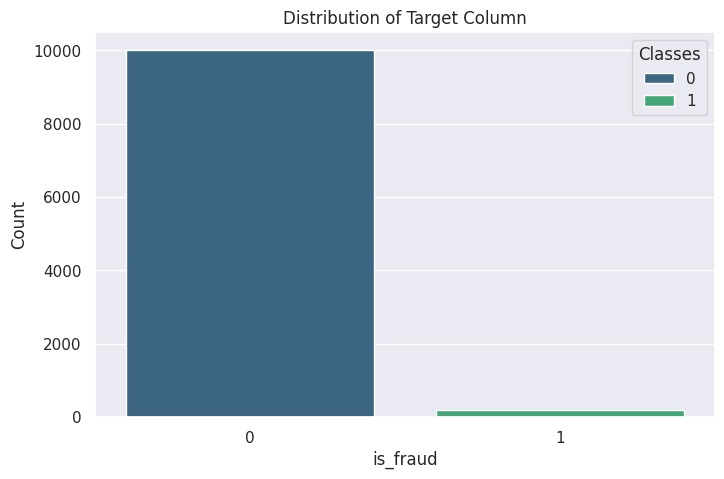

In [26]:
# visualize the target column distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=target_column, data=df, palette='viridis')
plt.title('Distribution of Target Column')
plt.xlabel(target_column)
plt.ylabel('Count')
plt.legend(title='Classes', loc='upper right', labels={0: 'Not Fraud', 1: 'Fraud'})

### Feature engineering 

### Machine learning model 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Hyperparameter tuning libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [23]:
## Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [24]:
### Save the model
import joblib